In [1]:

!pip install -q pycaret >/dev/null 2>&1

In [2]:

import numpy as np
import pandas as pd 
import seaborn as sns
from pycaret.regression import *
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
train_df=pd.read_csv('/kaggle/input/diamond-price-prediciton-2024/train.csv')
test_df=pd.read_csv('/kaggle/input/diamond-price-prediciton-2024/test.csv')


In [4]:
train_df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [5]:
test_df.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


In [9]:
train_df.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
test_df.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [4]:
train_df.drop('Id',axis=1,inplace=True)
test_df.drop('Id',axis=1,inplace=True)

## **Base_model**

In [19]:


pycaret_setup = setup(data=train_df, target='price',session_id=1)



,Description,Value
0,Session id,1
1,Target,price
2,Target type,Regression
3,Original data shape,"(43152, 10)"
4,Transformed data shape,"(43152, 27)"
5,Transformed train set shape,"(30206, 27)"
6,Transformed test set shape,"(12946, 27)"
7,Numeric features,6
8,Categorical features,3
9,Preprocess,True


In [20]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,285.0947,299688.1467,546.8636,0.9812,0.1071,0.0790,6.3240
lightgbm,Light Gradient Boosting Machine,293.2721,317136.4768,562.2893,0.9801,0.1116,0.0857,0.8360
et,Extra Trees Regressor,279.7634,316194.3342,561.7003,0.9801,0.0967,0.0700,14.7450
rf,Random Forest Regressor,280.3406,317587.9963,562.9403,0.9800,0.0960,0.0692,18.5840
xgboost,Extreme Gradient Boosting,291.1937,327947.1379,571.9099,0.9794,0.1008,0.0752,0.6100
gbr,Gradient Boosting Regressor,407.3925,547361.5054,739.1777,0.9656,0.2058,0.1295,2.6250
dt,Decision Tree Regressor,375.0088,592405.2199,768.9809,0.9627,0.1293,0.0899,0.5730
knn,K Neighbors Regressor,549.3642,1046670.0328,1022.1267,0.9342,0.1976,0.1532,0.7960
ridge,Ridge Regression,738.5079,1259792.6628,1121.0512,0.9208,0.5668,0.3893,0.1210
br,Bayesian Ridge,738.1642,1259830.5880,1121.0610,0.9208,0.5670,0.3891,0.1300


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

<Axes: >

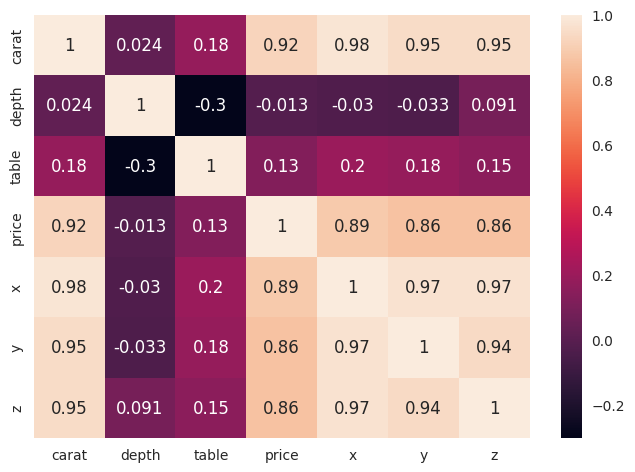

In [26]:
corr_mat=train_df.corr(numeric_only=True)
sns.heatmap(corr_mat,annot=True)

In [5]:
train_df.drop(['y','z'],axis=1,inplace=True)
test_df.drop(['y','z'],axis=1,inplace=True)

In [31]:
pycaret_setup = setup(data=train_df, target='price',session_id=1)

,Description,Value
0,Session id,1
1,Target,price
2,Target type,Regression
3,Original data shape,"(43152, 8)"
4,Transformed data shape,"(43152, 25)"
5,Transformed train set shape,"(30206, 25)"
6,Transformed test set shape,"(12946, 25)"
7,Numeric features,4
8,Categorical features,3
9,Preprocess,True


In [32]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,287.8105,301407.9113,548.5611,0.9810,0.1100,0.0822,5.6800
lightgbm,Light Gradient Boosting Machine,294.3573,317493.7518,562.8646,0.9800,0.1116,0.0857,0.6980
rf,Random Forest Regressor,292.7247,331359.3592,575.0181,0.9792,0.1053,0.0792,14.3560
xgboost,Extreme Gradient Boosting,297.2736,336181.6132,579.2083,0.9788,0.1071,0.0807,1.0200
et,Extra Trees Regressor,296.0723,344309.1406,586.1329,0.9783,0.1081,0.0799,12.9080
gbr,Gradient Boosting Regressor,408.6883,553542.7130,743.2341,0.9652,0.2029,0.1283,3.3300
dt,Decision Tree Regressor,383.6176,599689.8285,773.6455,0.9623,0.1398,0.1004,0.5090
lasso,Lasso Regression,736.9213,1258868.1007,1120.5971,0.9208,0.5636,0.3854,0.1690
llar,Lasso Least Angle Regression,736.8526,1258860.5833,1120.5926,0.9208,0.5635,0.3853,0.1200
lr,Linear Regression,737.8793,1258463.6126,1120.4111,0.9208,0.5676,0.3891,0.7120


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [33]:
train_df.head()

,carat,cut,color,clarity,depth,table,price,x
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76


In [37]:
train_df.cut.unique()

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

In [38]:
train_df.color.unique()

array(['I', 'G', 'F', 'H', 'D', 'E', 'J'], dtype=object)

In [6]:
X=train_df.drop('price',axis=True)
Y=train_df.price

In [7]:
categorical_cols = X.select_dtypes('O').columns.to_list()
numerical_cols = X.select_dtypes(np.number).columns.to_list()

In [82]:
categorical_transformer = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder())
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [83]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

In [84]:
train_df1=preprocessor.fit_transform(X)

In [86]:
train_df1=pd.DataFrame(train_df1,columns=X.columns)

In [88]:
train_df1['price']=Y

In [90]:
train_df1.head()

,carat,cut,color,clarity,depth,table,x,price
0,2.0,5.0,3.0,0.553529,0.036799,-0.205180,0.747755,4270
1,3.0,3.0,7.0,1.503722,-0.590188,0.242472,1.470153,15164
2,2.0,2.0,5.0,-1.009010,-0.311527,-0.652832,-1.160802,828
3,2.0,3.0,5.0,-0.565586,-0.381192,-0.652832,-0.482997,1577
4,3.0,4.0,7.0,-0.206625,-0.520523,-0.205180,0.025357,2596


In [97]:
pycaret_setup = setup(data=train_df1, target='price',session_id=1,train_size=0.99)

,Description,Value
0,Session id,1
1,Target,price
2,Target type,Regression
3,Original data shape,"(43152, 8)"
4,Transformed data shape,"(43152, 8)"
5,Transformed train set shape,"(42720, 8)"
6,Transformed test set shape,"(432, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [92]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,281.1293,293935.6304,541.6127,0.9815,0.1055,0.0800,5.5250
lightgbm,Light Gradient Boosting Machine,290.2568,313054.9762,558.7204,0.9803,0.1105,0.0849,0.6010
xgboost,Extreme Gradient Boosting,291.0825,326904.9960,571.0435,0.9794,0.1043,0.0790,0.1670
rf,Random Forest Regressor,294.3361,338327.2702,580.7211,0.9787,0.1050,0.0792,3.9990
et,Extra Trees Regressor,294.6905,341402.1439,583.5254,0.9785,0.1076,0.0797,2.8190
gbr,Gradient Boosting Regressor,373.9065,469091.5184,683.6859,0.9705,0.1726,0.1155,0.9980
dt,Decision Tree Regressor,389.3059,625543.8468,790.2626,0.9606,0.1409,0.1012,0.0810
knn,K Neighbors Regressor,464.4604,738905.4624,858.0021,0.9535,0.1808,0.1367,0.0910
ada,AdaBoost Regressor,959.0561,1682497.3593,1296.6739,0.8941,0.4001,0.4192,0.5840
br,Bayesian Ridge,861.5331,1805974.2744,1342.2887,0.8864,0.6046,0.3829,0.0240


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [8]:


cut_order = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
color_order = ["J", "I", "H", "G", "F", "E", "D"]
clarity_order = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]


categorical_transformer = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder(categories=[cut_order, color_order, clarity_order]))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

In [10]:
train_df1=preprocessor.fit_transform(X)
train_df1=pd.DataFrame(train_df1,columns=X.columns)
train_df1['price']=Y

In [11]:
pycaret_setup = setup(data=train_df1, target='price',session_id=1)

,Description,Value
0,Session id,1
1,Target,price
2,Target type,Regression
3,Original data shape,"(43152, 8)"
4,Transformed data shape,"(43152, 8)"
5,Transformed train set shape,"(30206, 8)"
6,Transformed test set shape,"(12946, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [106]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,278.0984,287713.0771,535.9619,0.9819,0.1030,0.0787,5.3000
lightgbm,Light Gradient Boosting Machine,285.6977,302682.7516,549.6535,0.9810,0.1076,0.0827,0.5330
xgboost,Extreme Gradient Boosting,288.7121,322663.8176,567.5273,0.9797,0.1027,0.0781,0.1710
rf,Random Forest Regressor,290.5476,326371.2134,570.7584,0.9795,0.1035,0.0781,7.0980
et,Extra Trees Regressor,292.6333,335449.6446,578.4816,0.9789,0.1066,0.0791,2.7780
gbr,Gradient Boosting Regressor,348.2595,397258.2933,629.7100,0.9750,0.1697,0.1095,0.9360
dt,Decision Tree Regressor,382.0157,592834.0319,769.1014,0.9627,0.1396,0.1003,0.1860
knn,K Neighbors Regressor,456.0993,683911.8133,826.3162,0.9570,0.1763,0.1350,0.1950
ada,AdaBoost Regressor,843.9071,1238422.3704,1112.4997,0.9221,0.3989,0.4123,0.5710
br,Bayesian Ridge,803.2061,1463122.5511,1208.2927,0.9080,0.6438,0.4381,0.0410


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [12]:
model=create_model('catboost',verbose=False)

In [13]:
model.fit(train_df1.drop('price',axis=1),train_df1.price)

In [14]:
test_df1=preprocessor.fit_transform(test_df)
test_df1=pd.DataFrame(test_df1,columns=test_df.columns)

In [15]:
price=model.predict(test_df1)

In [16]:
test=pd.read_csv('/kaggle/input/diamond-price-prediciton-2024/test.csv')


In [17]:
price=pd.Series(price, name='price')


In [18]:
submission = pd.concat([test['Id'], price], axis=1)

In [20]:
submission.to_csv('submission_try1.csv', index=False)